
1. Title: Postoperative Patient Data

2. Source Information:
   -- Creators: Sharon Summers, School of Nursing, University of Kansas
                Medical Center, Kansas City, KS 66160
                Linda Woolery, School of Nursing, University of Missouri,
                Columbia, MO 65211
   -- Donor:    Jerzy W. Grzymala-Busse (jerzy@cs.ukans.edu) (913)864-4488
   -- Date:     June 1993

3. Past Usage:
   1. A. Budihardjo, J. Grzymala-Busse, L. Woolery (1991). Program LERS_LB 2.5
      as a tool for knowledge acquisition in nursing, Proceedings of the 4th
      Int. Conference on Industrial & Engineering Applications of AI & Expert
      Systems, pp. 735-740.

   2. L. Woolery, J. Grzymala-Busse, S. Summers, A. Budihardjo (1991). The use
      of machine learning program LERS_LB 2.5 in knowledge acquisition for
      expert system development in nursing. Computers in Nursing 9, pp. 227-234.

4. Relevant Information:
      The classification task of this database is to determine where
      patients in a postoperative recovery area should be sent to next.  
      Because hypothermia is a significant concern after surgery
      (Woolery, L. et. al. 1991), the attributes correspond roughly to body
      temperature measurements.

      Results:
      -- LERS (LEM2): 48% accuracy

5. Number of Instances: 90

6. Number of Attributes: 9 including the decision (class attribute)

7. Attribute Information:

     1. PATIENT_NUMBER (patient's identification number)
     2. L-CORE (patient's internal temperature in C):
              high (> 37), mid (>= 36 and <= 37), low (< 36)
     3. L-SURF (patient's surface temperature in C):
              high (> 36.5), mid (>= 36.5 and <= 35), low (< 35)
     4. L-O2 (oxygen saturation in %):
              excellent (>= 98), good (>= 90 and < 98),
              fair (>= 80 and < 90), poor (< 80)
     5. L-BP (last measurement of blood pressure):
              high (> 130/90), mid (<= 130/90 and >= 90/70), low (< 90/70)
     6. SURF-STBL (stability of patient's surface temperature):
              stable, mod-stable, unstable
     7. CORE-STBL (stability of patient's core temperature)
              stable, mod-stable, unstable
     8. BP-STBL (stability of patient's blood pressure)
              stable, mod-stable, unstable
     9. COMFORT (patient's perceived comfort at discharge, measured as
              an integer between 0 and 20)
     10. decision ADM-DECS (discharge decision):
              I (patient sent to Intensive Care Unit),
              S (patient prepared to go home),
              A (patient sent to general hospital floor)

8. Missing Attribute Values:
     Attribute 8 has 3 missing values

9. Class Distribution:
     I (2)
     S (24)
     A (64)






In [ ]:
import numpy as np # untuk komputasi numerik (matematika, array, statistik).
import pandas as pd # untuk manipulasi dan analisis data dalam format tabel.
import matplotlib.pyplot as plt # visualisasi data (grafik dasar seperti garis, batang).
import seaborn as sns # visualisasi statistik yang lebih menarik dan informatif.

# Menampilkan semua kolom dari dataframe saat mencetak dataframe
pd.set_option("display.max_columns", None)

In [ ]:
data = pd.read_csv('post-operative-new.data')

# Tampilkan 5 data teratas dari dataset
data.head()

,0,mid,low,excellent,mid.1,stable,stable.1,stable.2,15,A
0,1,mid,high,excellent,high,stable,stable,stable,10,S
1,2,high,low,excellent,high,stable,stable,mod-stable,10,A
2,3,mid,low,good,high,stable,unstable,mod-stable,15,A
3,4,mid,mid,excellent,high,stable,stable,stable,10,A
4,5,high,low,good,mid,NaN,stable,unstable,15,S


In [ ]:
data.shape

(89, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   0          89 non-null     int64 
 1   mid        89 non-null     object
 2   low        89 non-null     object
 3   excellent  80 non-null     object
 4   mid.1      89 non-null     object
 5   stable     80 non-null     object
 6   stable.1   89 non-null     object
 7   stable.2   89 non-null     object
 8   15         80 non-null     object
 9   A          88 non-null     object
dtypes: int64(1), object(9)
memory usage: 7.1+ KB


In [ ]:
data.describe()

,0
count,89.000000
mean,45.000000
std,25.836021
min,1.000000
25%,23.000000
50%,45.000000
75%,67.000000
max,89.000000


In [ ]:
data = data.drop(columns=data.columns[0], axis=1)

In [ ]:
data.columns = ['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL', 'COMFORT', 'ADM-DECS']

In [ ]:
object_cols = data.select_dtypes(include=['object']).columns

In [ ]:
for col in object_cols:
    unique_values = data[col].unique()
    if "?" in unique_values or np.nan in unique_values:
        print(f"Kolom '{col}' mengandung tanda tanya atau NaN:")
        print(unique_values)

Kolom 'COMFORT' mengandung tanda tanya atau NaN:
['10' '15' '05' nan '07' '?']


In [ ]:
nan_counts = data.isna().sum()
nan_cols = nan_counts[nan_counts > 0].index.tolist()
if nan_cols:
    print("Kolom dengan nilai NaN:")
    for col in nan_cols:
        print(f"- {col}: {nan_counts[col]} NaN")

Kolom dengan nilai NaN:
- L-O2: 9 NaN
- SURF-STBL: 9 NaN
- COMFORT: 9 NaN
- ADM-DECS: 1 NaN


In [ ]:
# Temukan kolom dengan nilai NaN
nan_cols = data.columns[data.isna().any()].tolist()

# Temukan kolom dengan tanda tanya
object_cols = data.select_dtypes(include=['object']).columns
question_mark_cols = []
for col in object_cols:
    if '?' in data[col].unique():
        question_mark_cols.append(col)

# Gabungkan kedua daftar kolom
cols_to_impute = nan_cols + question_mark_cols

In [ ]:
for col in cols_to_impute:
    # Hitung modus
    mode_value = data[col].mode()[0]

    # Ganti nilai NaN dengan modus
    data[col] = data[col].fillna(mode_value)

    # Ganti tanda tanya dengan modus
    if col in question_mark_cols:
        data[col] = data[col].replace('?', mode_value)

In [ ]:
data

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,high,excellent,high,stable,stable,stable,10,S
1,high,low,excellent,high,stable,stable,mod-stable,10,A
2,mid,low,good,high,stable,unstable,mod-stable,15,A
3,mid,mid,excellent,high,stable,stable,stable,10,A
4,high,low,good,mid,stable,stable,unstable,15,S
...,...,...,...,...,...,...,...,...,...
84,mid,mid,excellent,mid,unstable,stable,stable,10,A
85,mid,mid,excellent,mid,unstable,stable,stable,10,S
86,mid,mid,good,mid,unstable,stable,stable,15,A
87,mid,mid,excellent,mid,unstable,stable,stable,10,A


In [ ]:
nan_counts = data.isna().sum()
nan_cols = nan_counts[nan_counts > 0].index.tolist()

if nan_cols:
    print("Kolom dengan nilai NaN:")
    for col in nan_cols:
        print(f"- {col}: {nan_counts[col]} NaN")
else:
    print("Tidak ada nilai NaN yang ditemukan.")

Tidak ada nilai NaN yang ditemukan.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   L-CORE     89 non-null     object
 1   L-SURF     89 non-null     object
 2   L-O2       89 non-null     object
 3   L-BP       89 non-null     object
 4   SURF-STBL  89 non-null     object
 5   CORE-STBL  89 non-null     object
 6   BP-STBL    89 non-null     object
 7   COMFORT    89 non-null     object
 8   ADM-DECS   89 non-null     object
dtypes: object(9)
memory usage: 6.4+ KB


In [ ]:
# menghitung nilai Null pada dataset
data.isnull().sum()

,0
L-CORE,0
L-SURF,0
L-O2,0
L-BP,0
SURF-STBL,0
CORE-STBL,0
BP-STBL,0
COMFORT,0
ADM-DECS,0


In [ ]:
data.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,high,excellent,high,stable,stable,stable,10,S
1,high,low,excellent,high,stable,stable,mod-stable,10,A
2,mid,low,good,high,stable,unstable,mod-stable,15,A
3,mid,mid,excellent,high,stable,stable,stable,10,A
4,high,low,good,mid,stable,stable,unstable,15,S


In [ ]:
data

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,high,excellent,high,stable,stable,stable,10,S
1,high,low,excellent,high,stable,stable,mod-stable,10,A
2,mid,low,good,high,stable,unstable,mod-stable,15,A
3,mid,mid,excellent,high,stable,stable,stable,10,A
4,high,low,good,mid,stable,stable,unstable,15,S
...,...,...,...,...,...,...,...,...,...
84,mid,mid,excellent,mid,unstable,stable,stable,10,A
85,mid,mid,excellent,mid,unstable,stable,stable,10,S
86,mid,mid,good,mid,unstable,stable,stable,15,A
87,mid,mid,excellent,mid,unstable,stable,stable,10,A


In [ ]:
data['ADM-DECS'] = data['ADM-DECS'].map({'S': 1, 'A': 2, 'A ': 2, 'I': 3})
print(data['ADM-DECS'].unique())

[1 2 3]


In [ ]:
# Mengidentifikasi jenis kolom (variabel) dalam sebuah dataframe berdasarkan tipe data dan karakteristiknya

def grab_col_names(dataframe, cat_th = 10, car_th = 20): #  memisahkan kolom dalam dataset berdasarkan tipe dan karakteristiknya.

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]] # kolom kategorikal (tipe "category", "object", "bool", atau numerik dengan unique values < cat_th).
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"] and dataframe[col].nunique() < cat_th] # kolom numerik yang bertindak seperti kategorikal (berdasarkan jumlah unique values).
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object"] and dataframe[col].nunique() > car_th] # kolom kategorikal dengan unique values > car_th (high cardinality).

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # kolom numerik murni (int64, float64) yang bukan kategorikal.
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Jumlah observasi: {dataframe.shape[0]}")
    print(f"Jumlah variabel: {dataframe.shape[1]}")
    print(f"Kolom kategorikal: {len(cat_cols)}")
    print(f"Kolom Numerik: {len(num_cols)}")
    print(f"Kategori tapi kardinal: {len(cat_but_car)}")
    print(f"Numerik tapi kategorikal: {len(num_but_cat)}")

    # mengembalikan daftar kolom yang dikelompokkan berdasarkan tipe (cat_cols, num_cols, cat_but_car).
    return cat_cols, num_cols, cat_but_car

In [ ]:
# Memanggil fungsi grab_col_names yang telah didefinisikan untuk memisahkan kolom-kolom dalam dataframe menjadi tiga kategori berdasarkan tipe data dan karakteristik distribusinya
cat_cols, num_cols, cat_but_car = grab_col_names(data)

Jumlah observasi: 89
Jumlah variabel: 9
Kolom kategorikal: 9
Kolom Numerik: 0
Kategori tapi kardinal: 0
Numerik tapi kategorikal: 1


In [ ]:
# Memvisualisasikan distribusi kolom-kolom kategorikal dalam sebuah dataframe menggunakan dua jenis plot: countplot dan pie plot
def plot_categorical(dataframe, categorical_columns): # membuat visualisasi untuk kolom kategorikal dalam dataset.
    num_cols = len(categorical_columns) # daftar kolom kategorikal yang akan divisualisasikan.
    num_rows = num_cols
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        # Countplot: Membuat countplot untuk distribusi jumlah kategori.
        sns.countplot(x=col, data=dataframe, ax=axes[2*i], hue=col) # menunjukkan jumlah observasi dalam setiap kategori menggunakan bar chart.
        axes[2*i].set_title(f'{col} Count')
        axes[2*i].set_xlabel(col)
        axes[2*i].set_ylabel('Count')

        # Pieplot: Membuat pieplot untuk distribusi proporsi kategori.
        dataframe[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[2*i+1]) # menampilkan proporsi kategori dalam bentuk diagram lingkaran.
        axes[2*i+1].set_title(f'{col} Distribution')
        axes[2*i+1].set_ylabel('')

    # Menyesuaikan layout dengan plt.tight_layout() untuk hasil visualisasi yang rapi.
    plt.tight_layout()
    plt.show()


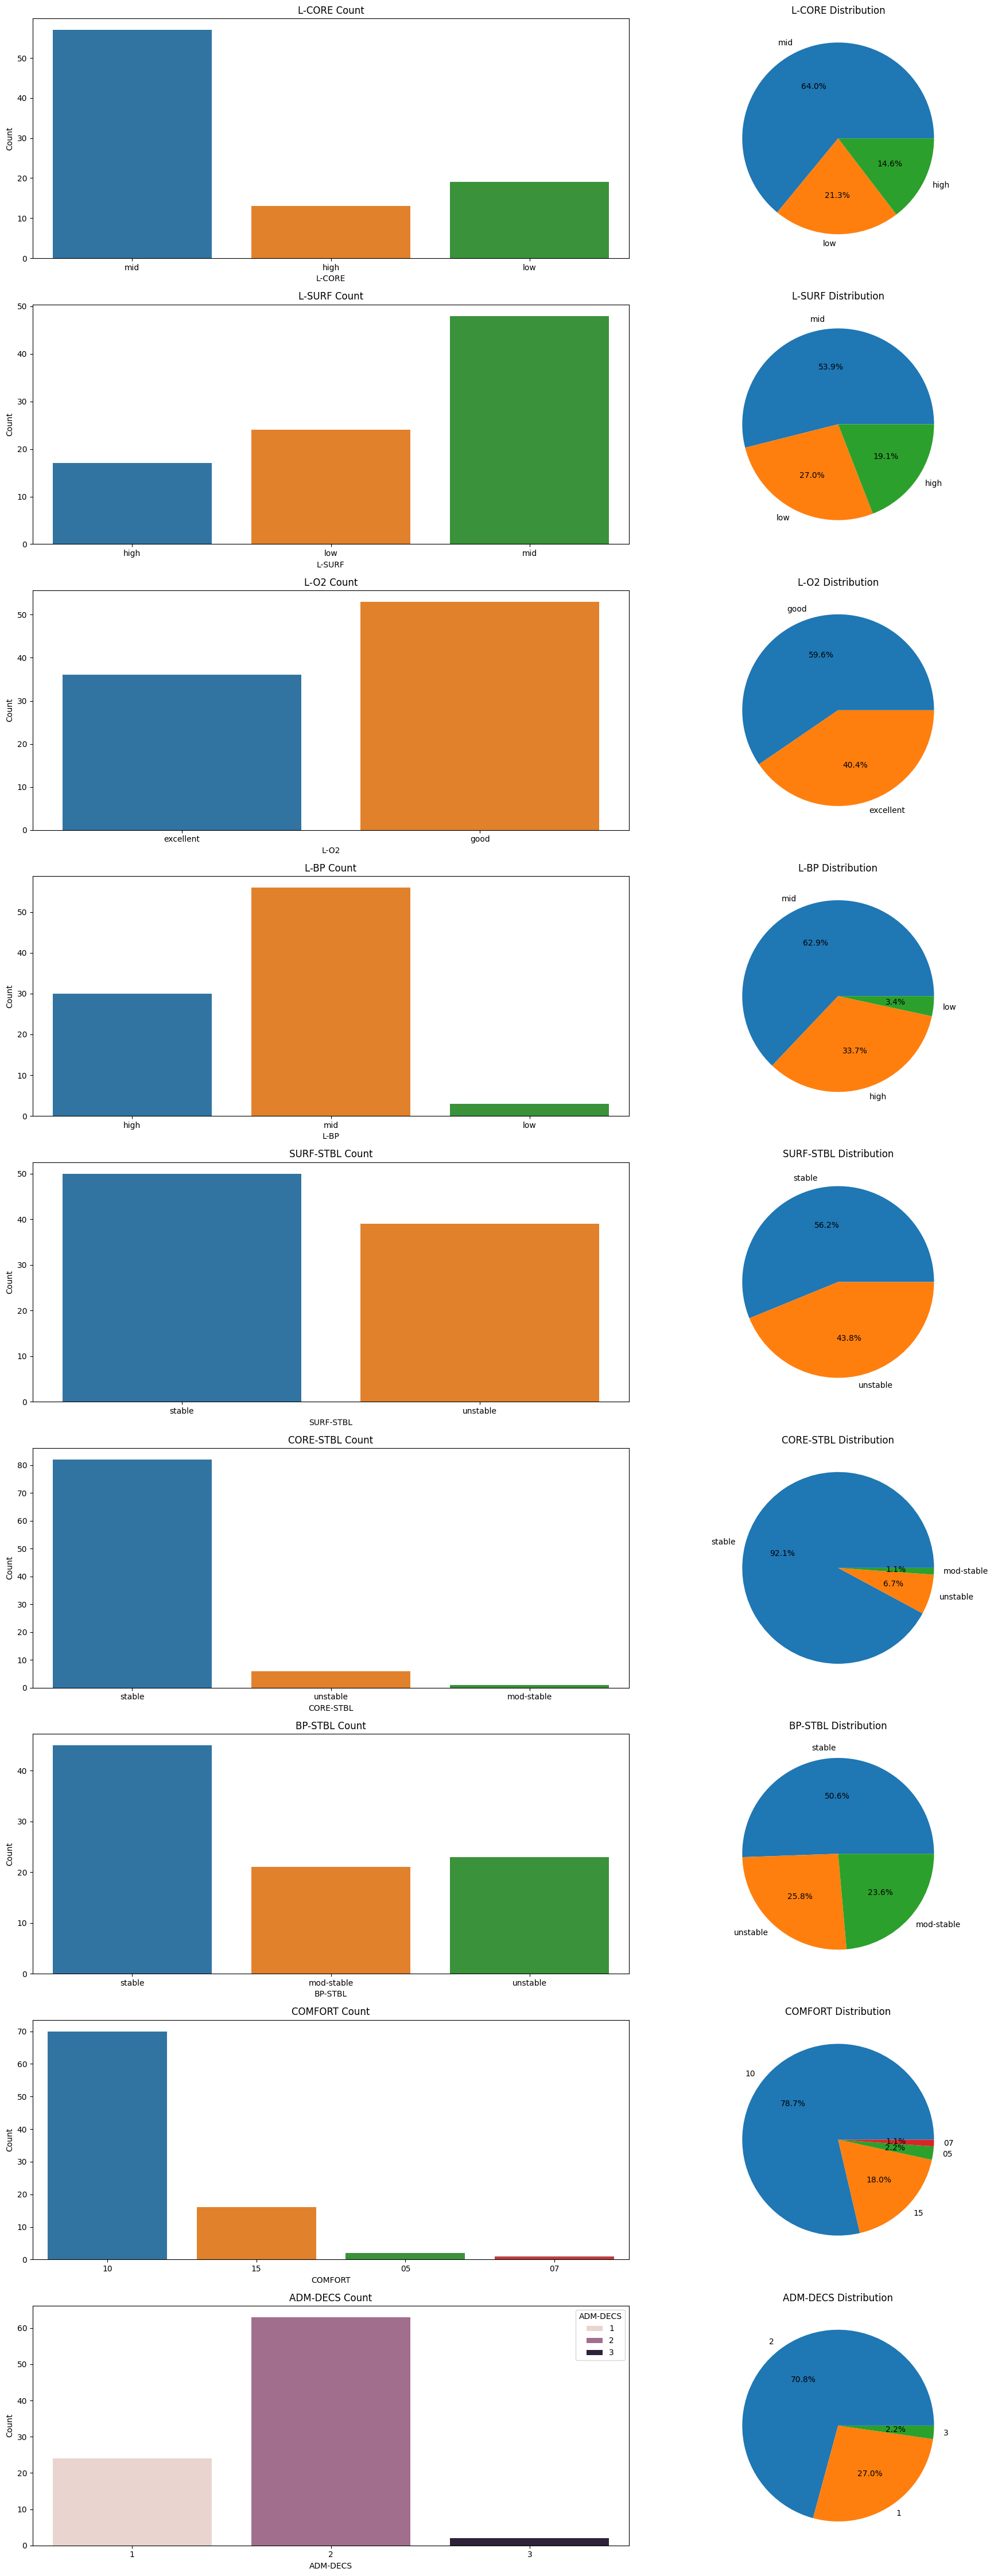

In [ ]:
plot_categorical(data, cat_cols)


In [ ]:
# Menganalisis hubungan antara kolom kategorikal dengan target (variabel dependen) dalam sebuah dataframe, dan menyajikan hasilnya dalam bentuk tabel dan visualisasi bar chart
def target_summary_with_cat_visualized(dataframe, target, categorical_col):
    # Rata-rata nilai target dihitung untuk setiap kategori
    grouped_data = dataframe.groupby(categorical_col)[target].mean()

    # Membuat Dataframe dari Hasil Pengelompokan
    summary_df = pd.DataFrame({"TARGET_MEAN": grouped_data})

    # Visualisasi dengan Bar Chart
    plt.figure(figsize=(5, 5))
    summary_df.plot(kind='bar')
    plt.title('Mean Target by ' + categorical_col)
    plt.xlabel(categorical_col)
    plt.ylabel('Mean Target')
    plt.xticks(rotation=1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}))
    print("-"*50)

<Figure size 500x500 with 0 Axes>

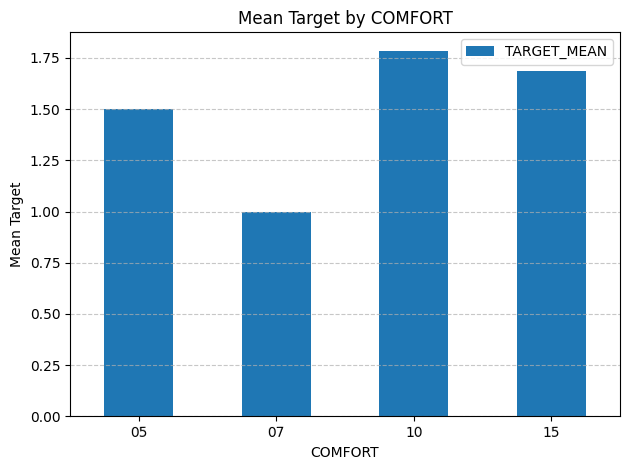

         TARGET_MEAN
COMFORT             
05          1.500000
07          1.000000
10          1.785714
15          1.687500
--------------------------------------------------


In [ ]:
target_summary_with_cat_visualized(dataframe=data, target="ADM-DECS", categorical_col="COMFORT")

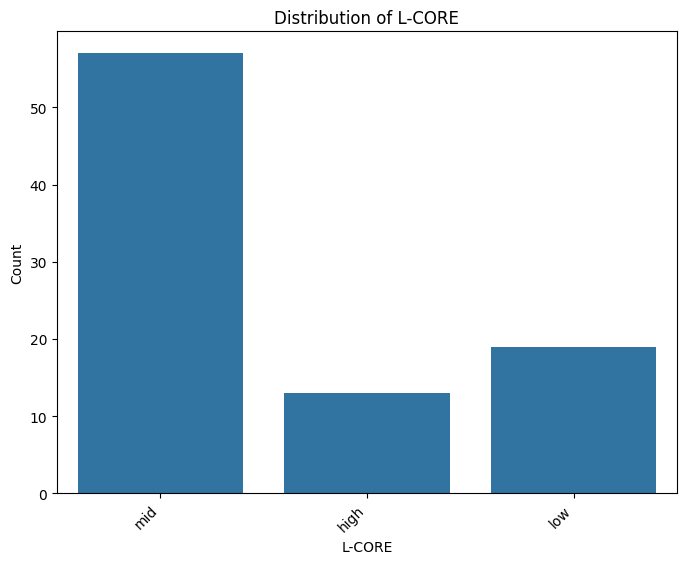

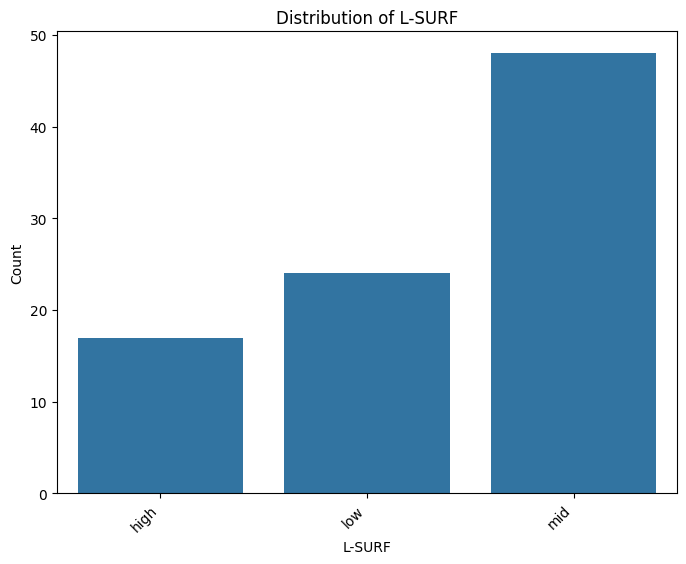

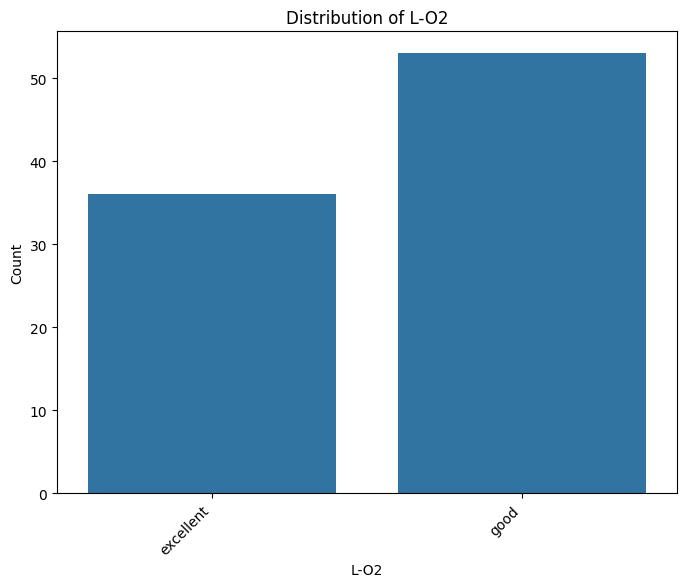

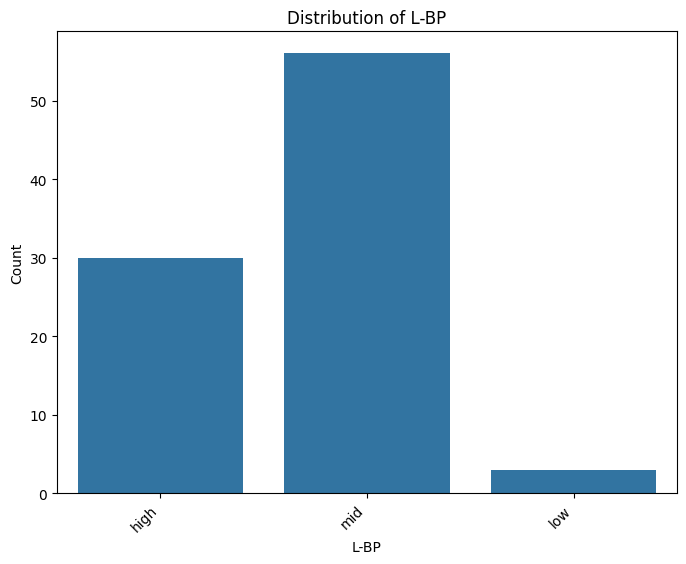

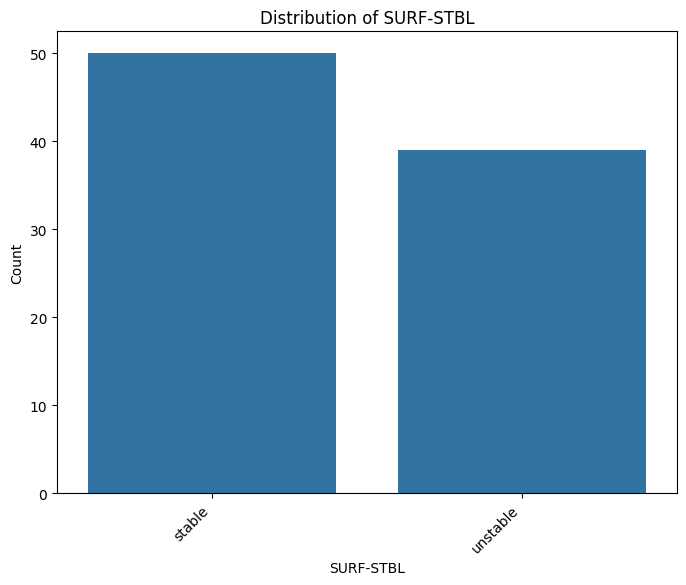

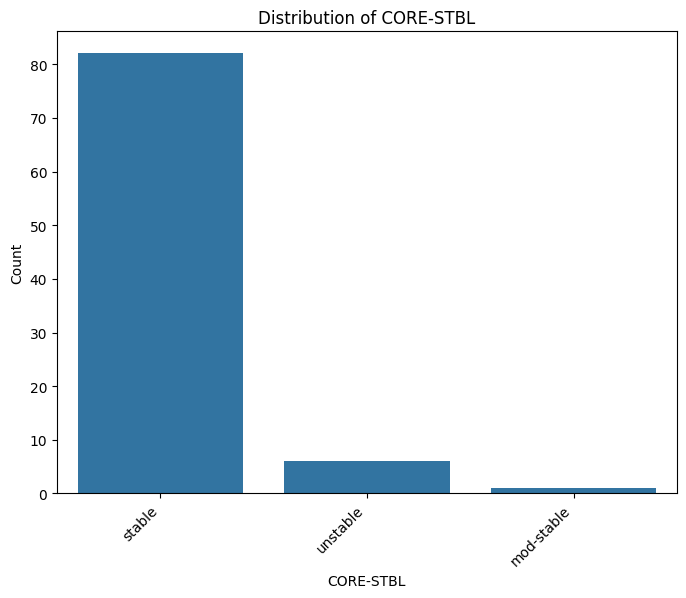

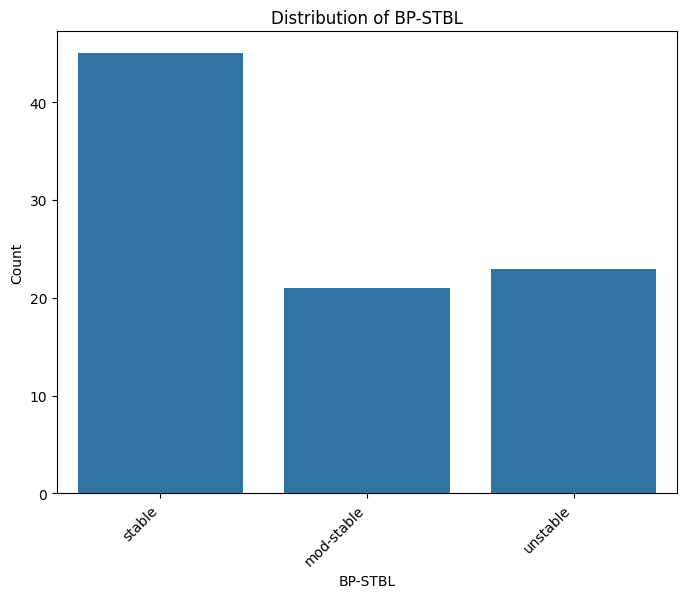

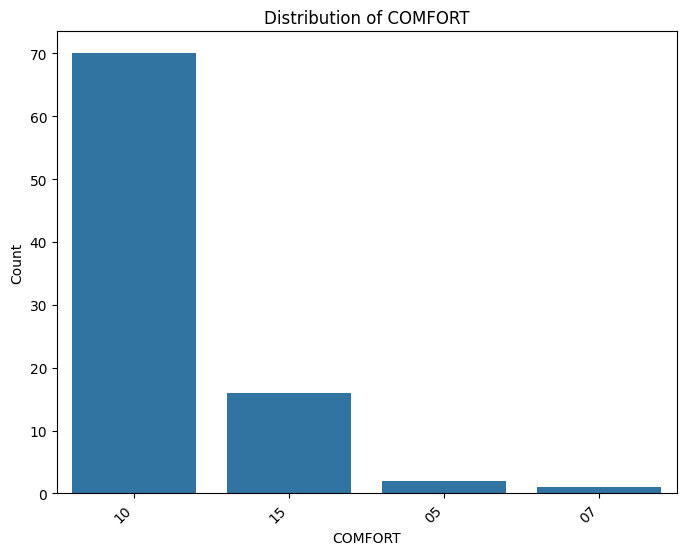

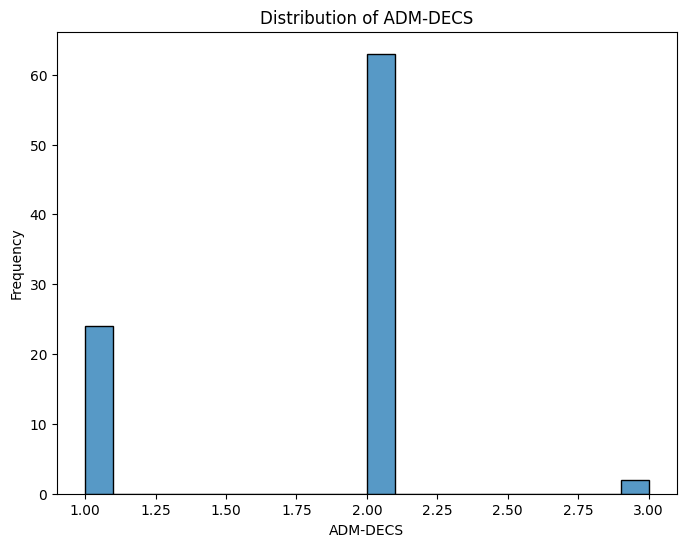

In [ ]:
# Assuming 'data' is your DataFrame
def plot_all_distributions(dataframe):
    """
    Creates distributions for all columns in the DataFrame based on their data type.

    Args:
        dataframe: The Pandas DataFrame to analyze.
    """

    for column in dataframe.columns:
        if dataframe[column].dtype in ['int64', 'float64']:
            # Numerical distributions (histogram)
            plt.figure(figsize=(8, 6))
            sns.histplot(dataframe[column], bins=20)  # Adjust bins as needed
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()

        elif dataframe[column].dtype in ['object', 'category', 'bool']:
            # Categorical distributions (countplot)
            plt.figure(figsize=(8, 6))
            sns.countplot(x=column, data=dataframe)
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
            plt.show()

# Call the function to plot distributions for all columns
plot_all_distributions(data)

In [ ]:
# Menghitung frekuensi kemunculan nilai unik dalam sebuah kolom atau objek Pandas
data.value_counts()

L-CORE  L-SURF  L-O2       L-BP  SURF-STBL  CORE-STBL  BP-STBL     COMFORT  ADM-DECS
mid     mid     excellent  mid   unstable   stable     stable      10       2           4
                good       mid   stable     stable     stable      10       2           3
low     mid     excellent  high  stable     stable     mod-stable  10       2           2
mid     mid     good       high  stable     stable     stable      10       2           2
                           mid   unstable   stable     stable      15       2           2
                                                                                       ..
low     mid     good       mid   stable     stable     stable      15       1           1
                           high  unstable   stable     stable      10       3           1
                excellent  mid   stable     stable     stable      10       1           1
                           high  stable     stable     unstable    10       1           1
mid     mid     good       mid   unstable   stable     unstable    15       2           1
Name: count, Length: 77, dtype: int64

In [ ]:
# Perika jumlah baris duplikat
data.duplicated().sum()

12

In [ ]:
# Menampilkan data duplikat
duplicate_rows = data.duplicated()
print("All Duplicate Rows:")
data[data.duplicated(keep=False)]

All Duplicate Rows:


,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
3,mid,mid,excellent,high,stable,stable,stable,10,2
12,mid,high,good,mid,stable,stable,mod-stable,10,2
18,mid,mid,good,mid,stable,stable,stable,10,2
22,mid,mid,good,mid,stable,stable,stable,10,2
26,low,mid,excellent,high,stable,stable,mod-stable,10,2
33,low,mid,excellent,high,stable,stable,mod-stable,10,2
34,mid,mid,good,mid,stable,stable,stable,10,2
43,low,low,excellent,mid,stable,stable,stable,10,2
46,mid,mid,excellent,mid,unstable,stable,stable,10,2
54,mid,mid,good,mid,unstable,stable,stable,15,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   L-CORE     89 non-null     object
 1   L-SURF     89 non-null     object
 2   L-O2       89 non-null     object
 3   L-BP       89 non-null     object
 4   SURF-STBL  89 non-null     object
 5   CORE-STBL  89 non-null     object
 6   BP-STBL    89 non-null     object
 7   COMFORT    89 non-null     object
 8   ADM-DECS   89 non-null     int64 
dtypes: int64(1), object(8)
memory usage: 6.4+ KB


In [ ]:
data

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,high,excellent,high,stable,stable,stable,10,1
1,high,low,excellent,high,stable,stable,mod-stable,10,2
2,mid,low,good,high,stable,unstable,mod-stable,15,2
3,mid,mid,excellent,high,stable,stable,stable,10,2
4,high,low,good,mid,stable,stable,unstable,15,1
...,...,...,...,...,...,...,...,...,...
84,mid,mid,excellent,mid,unstable,stable,stable,10,2
85,mid,mid,excellent,mid,unstable,stable,stable,10,1
86,mid,mid,good,mid,unstable,stable,stable,15,2
87,mid,mid,excellent,mid,unstable,stable,stable,10,2


In [ ]:
# Define a mapping dictionary for the categorical values
mapping = {
    'low': 1,
    'mid': 2,
    'high': 3
}

# Convert the columns using the mapping dictionary
for col in ['L-CORE', 'L-SURF', 'L-BP']:
    # Replace values using the mapping dictionary
    data[col] = data[col].map(mapping)

    # If there are values that are not mapped (e.g., typos), handle them as needed
    # For example, you could replace them with NaN or a default value
    # data[col] = data[col].fillna(0)  # Replace unmapped values with 0 (adjust as needed)

    # Check unique values after conversion
    unique_values = data[col].unique()
    print(f"Unique values in column '{col}' after conversion: {unique_values}")

Unique values in column 'L-CORE' after conversion: [2 3 1]
Unique values in column 'L-SURF' after conversion: [3 1 2]
Unique values in column 'L-BP' after conversion: [3 2 1]


In [ ]:
# Define a mapping dictionary for L-O2
mapping_l_o2 = {
    'excellent': 1,
    'good': 2,
    'fair': 3,
    'poor': 4
}

# Convert the L-O2 column using the mapping dictionary
data['L-O2'] = data['L-O2'].map(mapping_l_o2)

# Check for unmapped values (optional, as before)
# data['L-O2'] = data['L-O2'].fillna(0)  # Replace unmapped values if needed

# Check unique values after conversion
unique_values_l_o2 = data['L-O2'].unique()
print(f"Unique values in column 'L-O2' after conversion: {unique_values_l_o2}")

Unique values in column 'L-O2' after conversion: [1 2]


In [ ]:
data

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,2,3,1,3,stable,stable,stable,10,1
1,3,1,1,3,stable,stable,mod-stable,10,2
2,2,1,2,3,stable,unstable,mod-stable,15,2
3,2,2,1,3,stable,stable,stable,10,2
4,3,1,2,2,stable,stable,unstable,15,1
...,...,...,...,...,...,...,...,...,...
84,2,2,1,2,unstable,stable,stable,10,2
85,2,2,1,2,unstable,stable,stable,10,1
86,2,2,2,2,unstable,stable,stable,15,2
87,2,2,1,2,unstable,stable,stable,10,2


In [ ]:
# Define a mapping dictionary for the stability columns
mapping_stability = {
    'stable': 1,
    'mod-stable': 2,
    'unstable': 3
}

# Convert the columns using the mapping dictionary
for col in ['SURF-STBL', 'CORE-STBL', 'BP-STBL']:
    data[col] = data[col].map(mapping_stability)

    # Check for unmapped values (optional, as before)
    # data[col] = data[col].fillna(0)  # Replace unmapped values if needed

    # Check unique values after conversion
    unique_values = data[col].unique()
    print(f"Unique values in column '{col}' after conversion: {unique_values}")

Unique values in column 'SURF-STBL' after conversion: [1 3]
Unique values in column 'CORE-STBL' after conversion: [1 3 2]
Unique values in column 'BP-STBL' after conversion: [1 2 3]


In [ ]:
data

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,2,3,1,3,1,1,1,10,1
1,3,1,1,3,1,1,2,10,2
2,2,1,2,3,1,3,2,15,2
3,2,2,1,3,1,1,1,10,2
4,3,1,2,2,1,1,3,15,1
...,...,...,...,...,...,...,...,...,...
84,2,2,1,2,3,1,1,10,2
85,2,2,1,2,3,1,1,10,1
86,2,2,2,2,3,1,1,15,2
87,2,2,1,2,3,1,1,10,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   L-CORE     89 non-null     int64 
 1   L-SURF     89 non-null     int64 
 2   L-O2       89 non-null     int64 
 3   L-BP       89 non-null     int64 
 4   SURF-STBL  89 non-null     int64 
 5   CORE-STBL  89 non-null     int64 
 6   BP-STBL    89 non-null     int64 
 7   COMFORT    89 non-null     object
 8   ADM-DECS   89 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 6.4+ KB


In [ ]:
# Get unique values in the 'COMFORT' column
unique_comfort_values = data['COMFORT'].unique()

# Print the unique values
print(f"Unique values in column 'COMFORT': {unique_comfort_values}")

Unique values in column 'COMFORT': ['10' '15' '05' '07']


In [ ]:
# Convert 'COMFORT' column to integer data type
data['COMFORT'] = data['COMFORT'].astype(int)

# Check the data type of the column (optional)
print(data['COMFORT'].dtype)

int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   L-CORE     89 non-null     int64
 1   L-SURF     89 non-null     int64
 2   L-O2       89 non-null     int64
 3   L-BP       89 non-null     int64
 4   SURF-STBL  89 non-null     int64
 5   CORE-STBL  89 non-null     int64
 6   BP-STBL    89 non-null     int64
 7   COMFORT    89 non-null     int64
 8   ADM-DECS   89 non-null     int64
dtypes: int64(9)
memory usage: 6.4 KB


In [ ]:
data_clean = data.drop_duplicates()
print("Seluruh baris yang duplikat")
data_clean[data_clean.duplicated(keep=False)]

Seluruh baris yang duplikat


,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS


In [ ]:
# Memberikan informasi detail tentang struktur dataframe
data_clean.info() # data_clean sebagai dataset yang telah bersih

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 0 to 88
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   L-CORE     77 non-null     int64
 1   L-SURF     77 non-null     int64
 2   L-O2       77 non-null     int64
 3   L-BP       77 non-null     int64
 4   SURF-STBL  77 non-null     int64
 5   CORE-STBL  77 non-null     int64
 6   BP-STBL    77 non-null     int64
 7   COMFORT    77 non-null     int64
 8   ADM-DECS   77 non-null     int64
dtypes: int64(9)
memory usage: 6.0 KB


In [ ]:
# Memberikan ringkasan statistik deskriptif dari kolom numerik
data_clean.describe()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,1.948052,1.909091,1.623377,2.311688,1.909091,1.168831,1.818182,10.805195,1.714286
std,0.626101,0.710482,0.487717,0.544343,1.002389,0.547785,0.854204,2.248034,0.509312
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000
25%,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,10.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,10.000000,2.000000
75%,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000,3.000000,10.000000,2.000000
max,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,15.000000,3.000000


In [ ]:
# Memisahkan fitur (X) dan target (y) dalam dataset
X = data_clean.drop("ADM-DECS", axis = 1)
y = data_clean["ADM-DECS"]

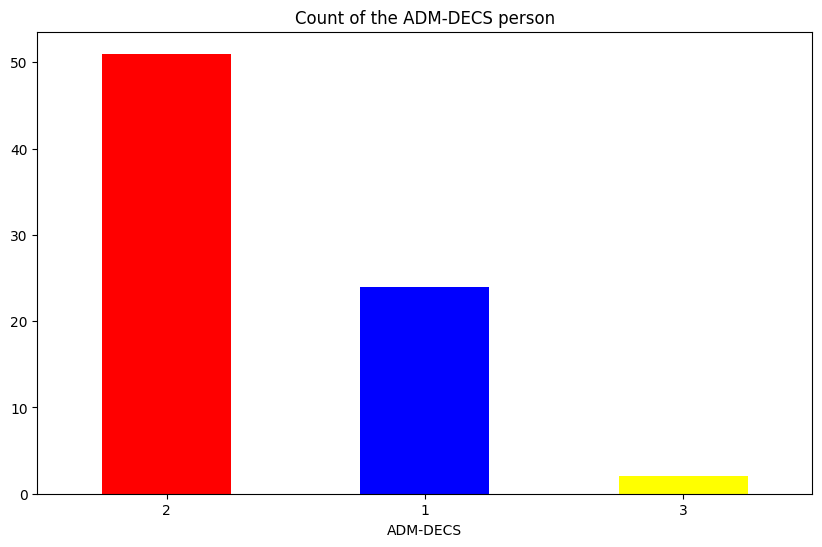

In [ ]:
# Membuat visualisasi berupa diagram batang (bar plot) yang menunjukkan jumlah individu yang termasuk dalam masing-masing kategori pada kolom infected
data_clean['ADM-DECS'].value_counts().plot(kind='bar',figsize=(10,6),color=['red','blue','yellow'])
plt.title("Count of the ADM-DECS person")
plt.xticks(rotation=0);

In [ ]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE dengan k_neighbors yang lebih kecil atau sama dengan jumlah sampel minoritas
smote = SMOTE(random_state=42, k_neighbors=1)  # Mengubah k_neighbors menjadi 1

# Mengaplikasikan oversampling pada dataset
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

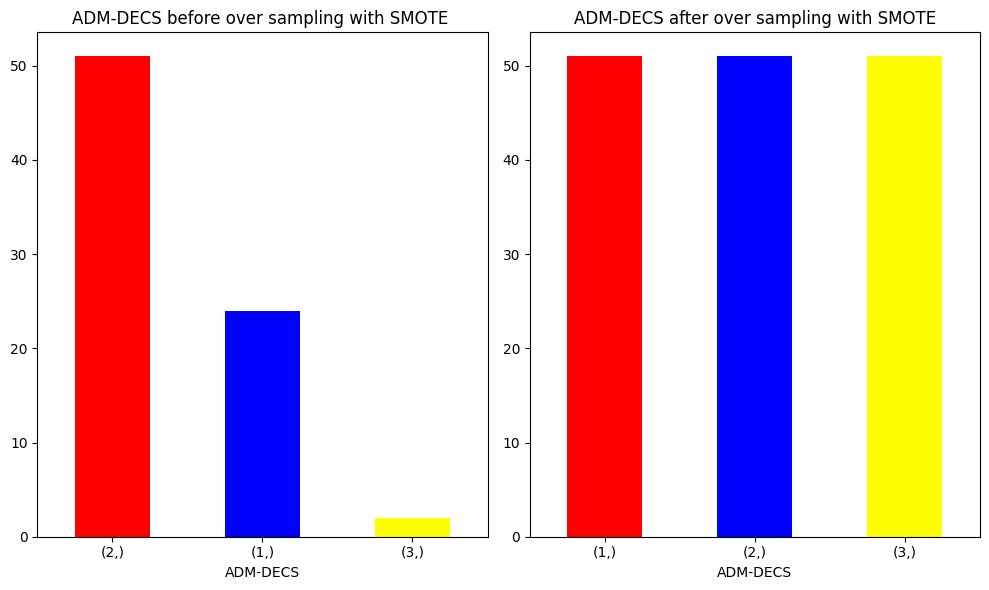

In [ ]:
plt.figure(figsize=(12, 4)) # Membuat sebuah figure (gambar) baru dengan ukuran 12x4 inci

new_df1 = pd.DataFrame(data=y) # Membuat DataFrame baru, new_df1

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['red','blue','yellow'])
plt.title("ADM-DECS before over sampling with SMOTE ")
plt.xticks(rotation=0);


plt.subplot(1, 2, 2) # Membuat subplot pertama dengan layout 1 baris dan 2 kolom
new_df2 = pd.DataFrame(data=y_smote_resampled)


new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['red','blue','yellow']) # Menghitung frekuensi masing-masing kategori (0 dan 1), membuat diagram batang (bar plot) berdasarkan frekuensi kategori
plt.title("ADM-DECS after over sampling with SMOTE") # Memberikan judul pada subplot pertama
plt.xticks(rotation=0); # Menetapkan label sumbu-x (kategori 0 dan 1) untuk tetap dalam posisi horizontal

plt.tight_layout() # Mengatur layout agar subplot tidak saling tumpang tindih
plt.show() # Menampilkan kedua plot dalam satu figure

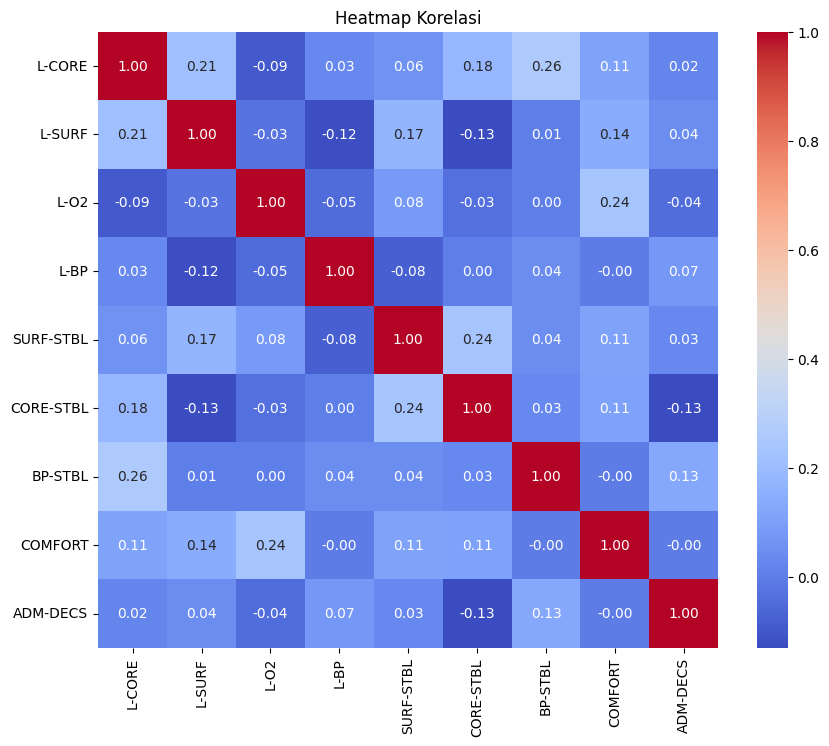

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = data.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))  # Mengatur ukuran figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split # Library untuk membantu memisahkan data menjadi dataset latih dan dataset validasi
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled) # 80% data latih, 20% data test

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Inisialisasi
nb = GaussianNB()
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state=42)

# ... (rest of your code, including param_grids) ...

# Change: Use the original model instances in your classifier_models dictionary:
classifier_models = {
    "Naive Bayes": nb,
    "Random Forest": rf,
    "SVM": svm,
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "K-Nearest Neighbors": knn,
    "AdaBoostClassifier": ada,
}

# ... (The rest of your GridSearchCV and evaluation code should work as intended) ...

In [ ]:
nb.fit(X_train, y_train)

nb_y_pred = nb.predict(X_test)
accuracy_nb = round(accuracy_score(y_test, nb_y_pred), 3)

print(confusion_matrix(y_test, nb_y_pred))

print(classification_report(y_test, nb_y_pred))


# Evaluasi skor akurasi, confusion matrix, dan classification report dari knn
nb = accuracy_score(y_test, nb.predict(X_test))

[[ 4  5  1]
 [ 2  7  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           1       0.67      0.40      0.50        10
           2       0.58      0.70      0.64        10
           3       0.85      1.00      0.92        11

    accuracy                           0.71        31
   macro avg       0.70      0.70      0.68        31
weighted avg       0.70      0.71      0.69        31



In [ ]:
rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)
accuracy_rf = round(accuracy_score(y_test, rf_y_pred), 3)

print(confusion_matrix(y_test, rf_y_pred))

print(classification_report(y_test, rf_y_pred))

[[ 7  3  0]
 [ 3  7  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           1       0.70      0.70      0.70        10
           2       0.70      0.70      0.70        10
           3       1.00      1.00      1.00        11

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31



In [ ]:
svm.fit(X_train, y_train)

svm_y_pred = svm.predict(X_test)
accuracy_svm = round(accuracy_score(y_test, svm_y_pred), 3)

print(confusion_matrix(y_test, svm_y_pred))

print(classification_report(y_test, svm_y_pred))

[[ 0  6  4]
 [ 4  5  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.45      0.50      0.48        10
           3       0.69      1.00      0.81        11

    accuracy                           0.52        31
   macro avg       0.38      0.50      0.43        31
weighted avg       0.39      0.52      0.44        31



In [ ]:
lr.fit(X_train, y_train)

lr_y_pred = lr.predict(X_test)
accuracy_lr = round(accuracy_score(y_test, lr_y_pred), 3)

print(confusion_matrix(y_test, lr_y_pred))

print(classification_report(y_test, lr_y_pred))

[[ 4  5  1]
 [ 3  7  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           1       0.57      0.40      0.47        10
           2       0.58      0.70      0.64        10
           3       0.92      1.00      0.96        11

    accuracy                           0.71        31
   macro avg       0.69      0.70      0.69        31
weighted avg       0.70      0.71      0.70        31



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dt.fit(X_train, y_train)

dt_y_pred = dt.predict(X_test)
accuracy_dt = round(accuracy_score(y_test, dt_y_pred), 3)

print(confusion_matrix(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))

# Evaluasi skor akurasi, confusion matrix, dan classification report dari decision tree
dt_acc = accuracy_score(y_test, dt.predict(X_test))
decision_tree_cm = confusion_matrix(y_test, dt.predict(X_test))

print(f"Training Accuracy Of Decision Tree Classifier is {accuracy_score(y_train, dt.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dt_acc} \n")

[[ 7  3  0]
 [ 3  7  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           1       0.70      0.70      0.70        10
           2       0.70      0.70      0.70        10
           3       1.00      1.00      1.00        11

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31

Training Accuracy Of Decision Tree Classifier is 0.9508196721311475
Test Accuracy of Decision Tree Classifier is 0.8064516129032258 



In [ ]:
knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)
accuracy_knn = round(accuracy_score(y_test, knn_y_pred), 3)

print(confusion_matrix(y_test, knn_y_pred))

print(classification_report(y_test, knn_y_pred))

# Evaluasi skor akurasi, confusion matrix, dan classification report dari knn
knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

[[ 7  3  0]
 [ 2  7  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           1       0.78      0.70      0.74        10
           2       0.70      0.70      0.70        10
           3       0.92      1.00      0.96        11

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.80      0.81      0.80        31

Training Accuracy of KNN is 0.8524590163934426
Test Accuracy of KNN is 0.8064516129032258 



In [ ]:
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost
adaboost_cm = confusion_matrix(y_test, ada.predict(X_test))
ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix : \n{adaboost_cm}\n")
print(f"Classification Report : \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 0.6557377049180327
Test Accuracy of Ada Boost Classifier is 0.6451612903225806 

Confusion Matrix : 
[[ 3  6  1]
 [ 3  6  1]
 [ 0  0 11]]

Classification Report : 
               precision    recall  f1-score   support

           1       0.50      0.30      0.38        10
           2       0.50      0.60      0.55        10
           3       0.85      1.00      0.92        11

    accuracy                           0.65        31
   macro avg       0.62      0.63      0.61        31
weighted avg       0.62      0.65      0.62        31



<ipython-input-59-bcee5e1b574f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


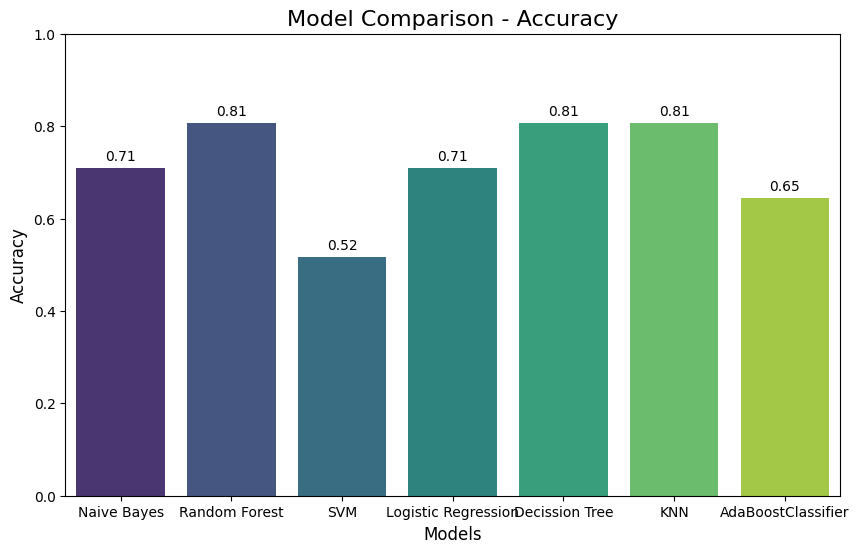

In [ ]:
# Evaluasi disini
models = ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression', 'Decission Tree', 'KNN', 'AdaBoostClassifier']
accuracies = [
    accuracy_score(y_test, nb_y_pred),
    accuracy_score(y_test, rf_y_pred),
    accuracy_score(y_test, svm_y_pred),
    accuracy_score(y_test, lr_y_pred),
    accuracy_score(y_test, dt_y_pred),
    accuracy_score(y_test, knn_y_pred),
    accuracy_score(y_test, ada.predict(X_test))
]
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.title('Model Comparison - Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, 1)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

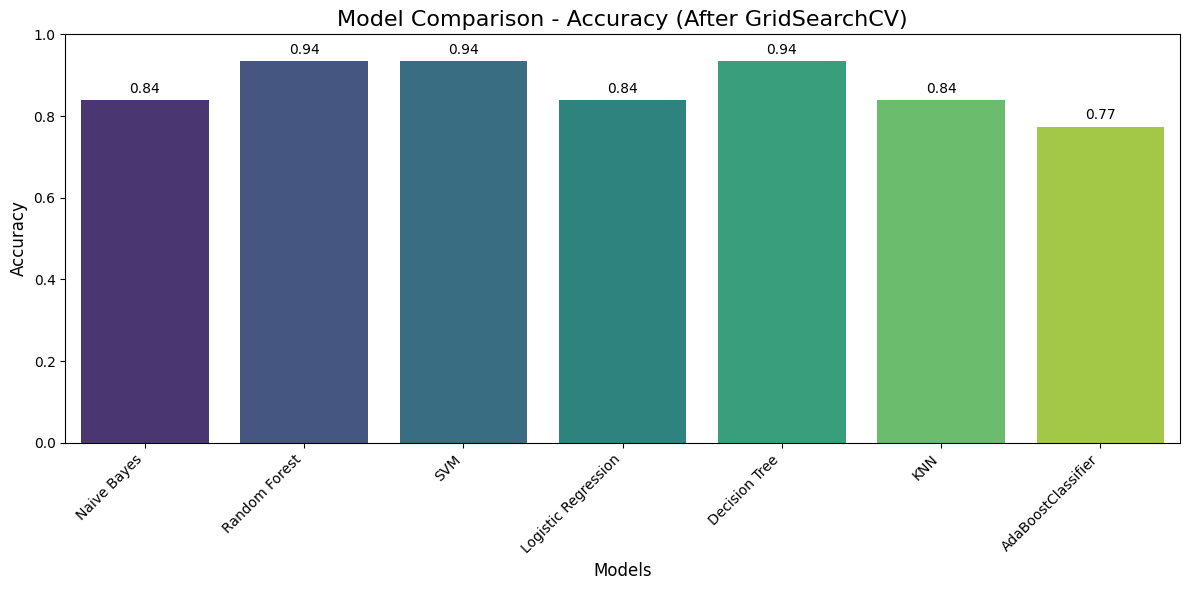

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the models and their respective parameter grids
models = {
    'Naive Bayes': (GaussianNB(), {}),  # No hyperparameters to tune for Naive Bayes
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [20, 30, 50],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'SVM': (SVC(random_state=42), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    'Logistic Regression': (LogisticRegression(random_state=42, max_iter=1000), {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2']  # You might need to install 'l1' solver: !pip install -U scikit-learn
    }),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [1, 3, 5],  # Mencoba n_neighbors yang lebih kecil
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }),
    'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.5, 1.0]
    })
}

# Perform GridSearchCV for each model
best_models = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_smote_resampled, y_smote_resampled)
    best_models[model_name] = grid_search.best_estimator_

# Evaluate the best models and plot the accuracies
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in best_models.values()]

plt.figure(figsize=(12, 6))
sns.barplot(x=list(best_models.keys()), y=accuracies, palette='viridis')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.title('Model Comparison - Accuracy (After GridSearchCV)', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0, 1)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()